In [1]:
#import libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
import random
import pickle as pkls

#local files being imported
import platform_opt
from players import *
import sims
from statistics import variance
#Note: when indexed as a list: group $A$ is 0, group $B$ is 1.
#      when indexed as a dict: group $A$ is -1, group $B$ is 1.

In [4]:
# SIMULATION PARAMETERS AGNOSTIC TO DATA
T = 14                 # max number of timesteps
M = 100000            # size of unit mass

In [5]:
pi,beta_dist,P,v,c,q = sims.get_params('facebook')

#theta_hat and theta_tilde learned with T = 15, epsilon = 0.05
#since the optimization in the following cell only needs to be run once per set of parameters

#T = 14, epsilon = 1e-4
theta_fair = {1: 0.0, -1: 0.810973068866342}
theta_opt = {1: 4.316992360088821e-11, -1: 0.9999999999745947}
theta_half = {1: 0.5, -1: 0.5}

#T = 12, epsilon = 1e-10
theta_fair = {1: 0.0, -1: 0.8248699654379131}
theta_opt ={1: 4.2866804763043903e-11, -1: 0.9999999999746445}
theta_half = {1: 0.5, -1: 0.5}

#T = 14, epsilon = 1e-10
theta_fair = {1: 0.0, -1: 0.8109288469677634}
theta_opt = {1: 4.316992360088821e-11, -1: 0.9999999999745947}
theta_half = {1: 0.5, -1: 0.5}

In [6]:
#how to show articles at timestep 1
epsilon = 1e-4
    
theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=0.1) #constrained with exposure equality
#theta_opt = platform_opt.opt_unconstrained(pi, q, T, epsilon,c,v,beta_dist) #unconstrained to optimize clicks

print(theta_fair)

{1: 0.09999999961561624, -1: 0.7173311968010447}


In [4]:
#run the experiments multiple times for paper results
num_trials = 50

players_list_fair = []
shown_fair = []
click_fair = []
share_fair = []
pof_fair = []

players_list_opt = []
shown_opt = []
click_opt = []
share_opt = []
pof_opt = []

players_list_half = []
shown_half = []
click_half = []
share_half = []
pof_half = []

for i in range(num_trials):
    players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair = sims.runModel(theta_fair, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_opt, shown_d_opt, click_d_opt, share_d_opt = sims.runModel(theta_opt, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_half, shown_d_half, click_d_half, share_d_half = sims.runModel(theta_half, T, pi, M, P, beta_dist, v,c,q)
    
    players_list_fair.append(players_in_model_fair + ([0] * (T - len(players_in_model_fair))))
    shown_fair.append(shown_d_fair)
    click_fair.append(click_d_fair)
    share_fair.append(share_d_fair)
    pof_fair.append(sum(players_in_model_fair[1:]))
    
    players_list_opt.append(players_in_model_opt + ([0] * (T - len(players_in_model_opt))))
    shown_opt.append(shown_d_opt)
    click_opt.append(click_d_opt)
    share_opt.append(share_d_opt)
    pof_opt.append(sum(players_in_model_opt[1:]))
    
    
    players_list_half.append(players_in_model_half + ([0] * (T - len(players_in_model_half))))
    shown_half.append(shown_d_half)
    click_half.append(click_d_half)
    share_half.append(share_d_half)
    pof_half.append(sum(players_in_model_half[1:]))


In [5]:
#pickle the data if needed
sims.saveRuns(players_list_fair, 'simulation_data/players_list_fair.pkl')
sims.saveRuns(shown_fair, 'simulation_data/shown_fair.pkl')
sims.saveRuns(click_fair, 'simulation_data/click_fair.pkl')
sims.saveRuns(share_fair, 'simulation_data/share_fair.pkl')
sims.saveRuns(pof_fair, 'simulation_data/pof_fair.pkl')

sims.saveRuns(players_list_opt, 'simulation_data/players_list_opt.pkl')
sims.saveRuns(shown_opt, 'simulation_data/shown_opt.pkl')
sims.saveRuns(click_opt, 'simulation_data/click_opt.pkl')
sims.saveRuns(share_opt, 'simulation_data/share_opt.pkl')
sims.saveRuns(pof_opt, 'simulation_data/pof_opt.pkl')

sims.saveRuns(players_list_half, 'simulation_data/players_list_half.pkl')
sims.saveRuns(shown_half, 'simulation_data/shown_half.pkl')
sims.saveRuns(click_half, 'simulation_data/click_half.pkl')
sims.saveRuns(share_half, 'simulation_data/share_half.pkl')
sims.saveRuns(pof_half, 'simulation_data/pof_half.pkl')

In [4]:
#unpickle the data as needed
#pickle the data if needed
players_list_fair = sims.loadRuns('simulation_data/players_list_fair.pkl')
shown_fair = sims.loadRuns('simulation_data/shown_fair.pkl')
click_fair = sims.loadRuns('simulation_data/click_fair.pkl')
share_fair = sims.loadRuns('simulation_data/share_fair.pkl')
pof_fair = sims.loadRuns('simulation_data/pof_fair.pkl')

players_list_opt = sims.loadRuns('simulation_data/players_list_opt.pkl')
shown_opt = sims.loadRuns('simulation_data/shown_opt.pkl')
click_opt = sims.loadRuns('simulation_data/click_opt.pkl')
share_opt = sims.loadRuns('simulation_data/share_opt.pkl')
pof_opt = sims.loadRuns('simulation_data/pof_opt.pkl')

players_list_half = sims.loadRuns('simulation_data/players_list_half.pkl')
shown_half = sims.loadRuns('simulation_data/shown_half.pkl')
click_half = sims.loadRuns('simulation_data/click_half.pkl')
share_half = sims.loadRuns('simulation_data/share_half.pkl')
pof_half = sims.loadRuns('simulation_data/pof_half.pkl')

In [6]:
#average intergroup exposure and share
#normalized by number of impressions/clicks in model
#higher is better here
print("Intergroup exposure and shares subject to fairness constraints")
show_avg_mp_fair = np.mean([x[(-1,1)] for x in shown_fair])
show_avg_pm_fair = np.mean([x[(1,-1)] for x in shown_fair])
print((show_avg_mp_fair + show_avg_pm_fair) / np.mean(players_list_fair))

share_avg_mp_fair = np.mean([x[(-1,1)] for x in share_fair])
share_avg_pm_fair = np.mean([x[(1,-1)] for x in share_fair])
denom_fair = [x[1:] for x in players_list_fair]
print((share_avg_mp_fair + share_avg_pm_fair) / np.mean(denom_fair)) 

print("Intergroup exposure and shares unconstrained")
show_avg_mp_opt = np.mean([x[(-1,1)] for x in shown_opt])
show_avg_pm_opt = np.mean([x[(1,-1)] for x in shown_opt])
print((show_avg_mp_opt + show_avg_pm_opt) / np.mean(players_list_opt))

share_avg_mp_opt = np.mean([x[(-1,1)] for x in share_opt])
share_avg_pm_opt = np.mean([x[(1,-1)] for x in share_opt])
denom_opt = [x[1:] for x in players_list_opt]
print((share_avg_mp_opt + share_avg_pm_opt) / np.mean(denom_opt))

print("Intergroup exposure and shares half exposure")
show_avg_mp_half = np.mean([x[(-1,1)] for x in shown_half])
show_avg_pm_half = np.mean([x[(1,-1)] for x in shown_half])
print((show_avg_mp_half + show_avg_pm_half) / np.mean(players_list_half))

share_avg_mp_half = np.mean([x[(-1,1)] for x in share_half])
share_avg_pm_half = np.mean([x[(1,-1)] for x in share_half])
denom_half = [x[1:] for x in players_list_half]
print((share_avg_mp_half + share_avg_pm_half) / np.mean(denom_half)) 

Intergroup exposure and shares subject to fairness constraints
2.396366399944776
0.2893436179528976
Intergroup exposure and shares unconstrained
1.5666555431430886
0.23577666826067398
Intergroup exposure and shares half exposure
6.474280144234416
1.3192865963363563


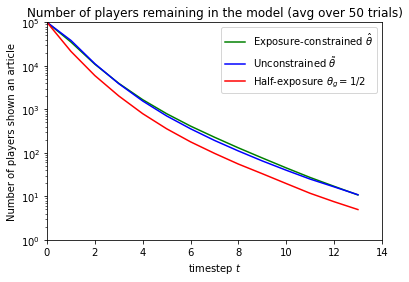

In [10]:
#eb_fair = sims.calc_errorbars(players_list_fair)
#eb_opt = sims.calc_errorbars(players_list_opt)
#eb_half = sims.calc_errorbars(players_list_half)

#plt.errorbar(np.arange(T), np.mean(players_list_fair, axis=0), yerr=eb_fair, color='green')
#plt.errorbar(np.arange(T), np.mean(players_list_opt, axis=0), yerr=eb_opt, color='blue')
#plt.errorbar(np.arange(T), np.mean(players_list_half, axis=0), yerr=eb_half, color='red')

plt.plot(np.mean(players_list_fair, axis=0), color='green')
plt.plot(np.mean(players_list_opt, axis=0), color='blue')
plt.plot(np.mean(players_list_half, axis=0), color='red')
plt.title("Number of players remaining in the model (avg over %i trials)" % (num_trials))
plt.ylabel("Number of players shown an article")
plt.xlabel("timestep $t$")
plt.yscale('log')
plt.xlim((0,T))
plt.ylim((1, M))
plt.legend(('Exposure-constrained $\hat \\theta$', 'Unconstrained $\\tilde \\theta$', 'Half-exposure $\\theta_g = 1/2$'))
plt.show()

[None, None, None, None, None, None]

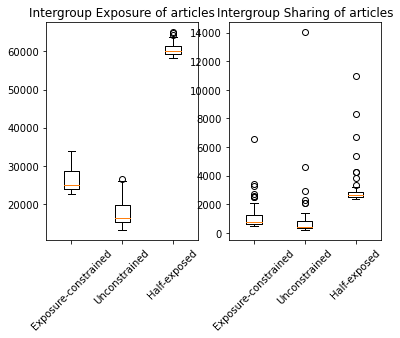

In [11]:
#calculate boxplot data
intergroup_fair_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_fair]
intergroup_fair_share = [x[(-1,1)] + x[(1,-1)] for x in share_fair]

intergroup_opt_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_opt]
intergroup_opt_share = [x[(-1,1)] + x[(1,-1)] for x in share_opt]

intergroup_half_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_half]
intergroup_half_share = [x[(-1,1)] + x[(1,-1)] for x in share_half]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown, intergroup_half_shown], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposed'])

ax2.set_title('Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share, intergroup_half_share], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposed'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

[None, None, None, None, None, None]

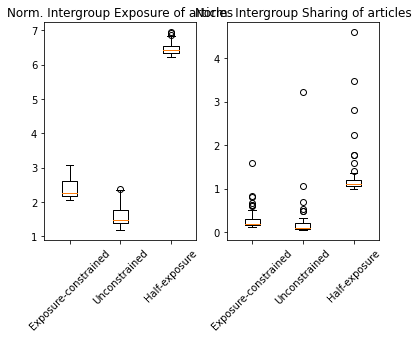

In [12]:
#calculate boxplot data, normalized by exposure size
intergroup_fair_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_fair) for x in shown_fair]
intergroup_fair_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_fair) for x in share_fair]

intergroup_opt_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_opt) for x in shown_opt]
intergroup_opt_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_opt) for x in share_opt]

intergroup_half_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_half) for x in shown_half]
intergroup_half_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_half) for x in share_half]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Norm. Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown, intergroup_half_shown], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])

ax2.set_title('Norm. Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share, intergroup_half_share], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

1.0845967922574724


{'whiskers': [<matplotlib.lines.Line2D at 0x28957fbd7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28957fbd6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28957fbd190>],
 'medians': [<matplotlib.lines.Line2D at 0x28957fc2d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x28957fc2af0>],
 'means': []}

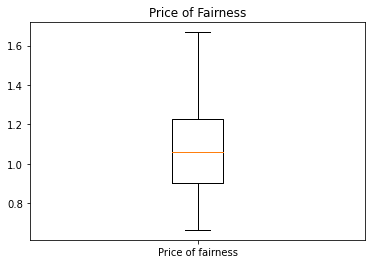

In [13]:
#boxplot for price of fairness
pof = [pof_opt[i] / pof_fair[i] for i in range(len(pof_opt))]
print(np.mean(pof))

fig1, ax1 = plt.subplots()

ax1.set_title('Price of Fairness')
ax1.boxplot(pof, labels=['Price of fairness'])

{(1, 1): 69867, (-1, 1): 4772, (1, -1): 19929, (-1, -1): 52710}
{(1, 1): 87534, (-1, 1): 6609, (1, -1): 18006, (-1, -1): 66700}
{(1, 1): 35061, (-1, 1): 29151, (1, -1): 30185, (-1, -1): 31996}
178849


[None, None, None, None, None, None]

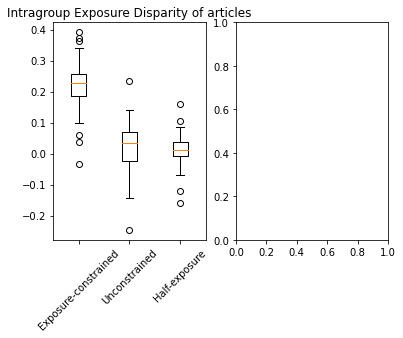

In [38]:
#calculate boxplots for difference in exposure 
#should be close to 0
# if np.abs removed, positive means article B shown more
print(shown_fair[0])
print(shown_opt[0])
print(shown_half[0])


impressions_fair = [sum(x)for x in players_list_fair]
exposure_disparity_fair_intra = [((x[(1,1)] / (pi[1] * impressions_fair[i]) - x[(-1,-1)] / (pi[-1] * impressions_fair[i]))) for i,x in enumerate(shown_fair)]
exposure_disparity_fair = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_fair]

impressions_opt = [sum(x) for x in players_list_opt]
print(impressions_opt[0])
exposure_disparity_opt_intra = [((x[(1,1)] / (pi[1] * impressions_opt[i]) - x[(-1,-1)] / (pi[-1] * impressions_opt[i]))) for i,x in enumerate(shown_opt)]
exposure_disparity_opt = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_opt]

impressions_half = [sum(x)for x in players_list_half]
exposure_disparity_half_intra = [((x[(1,1)] / (pi[1] * impressions_half[i]) - x[(-1,-1)] / (pi[-1] * impressions_half[i]))) for i,x in enumerate(shown_half)]
exposure_disparity_half = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_half]

# plot data
fig1, (ax1,ax2) = plt.subplots(1,2)

ax1.set_title('Intragroup Exposure Disparity of articles')
ax1.boxplot([exposure_disparity_fair_intra, exposure_disparity_opt_intra, exposure_disparity_half_intra], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

#ax2.set_title('Exposure Disparity of articles')
#ax2.boxplot([exposure_disparity_fair, exposure_disparity_opt, exposure_disparity_half], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

In [15]:
T=10
theta_A = {}
theta_B = {}
for exp in [0., 0.01, 0.05, 0.1, 0.2, 0.25]:
    theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=exp) #constrained with exposure equality 
    theta_A[exp] = theta_fair[-1]
    theta_B[exp] = theta_fair[1]
    
list_A = sorted(theta_A.items()) # sorted by key, return a list of tuples
eps_A, thetaA = zip(*list_A) # unpack a list of pairs into two tuples

list_B = sorted(theta_B.items()) # sorted by key, return a list of tuples
eps_B, thetaB = zip(*list_B) # unpack a list of pairs into two tuples



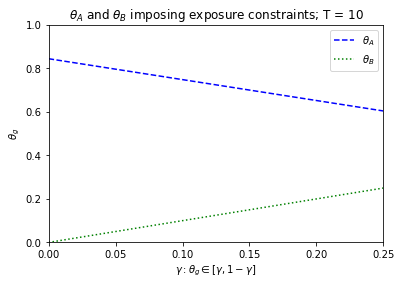

In [18]:
plt.plot(eps_A, thetaA, '--', color = 'blue')
plt.plot(eps_B, thetaB, ':', color= 'green')
plt.xlim((0,0.25))
plt.ylim((0,1.))
plt.title('$\\theta_A$ and $\\theta_B$ imposing exposure constraints; T = %i' % (T))
plt.legend(['$\\theta_A$', '$\\theta_B$'])
plt.xlabel('$\\gamma : \\theta_g \\in [\\gamma, 1-\\gamma]$')
plt.ylabel('$\\theta_g$')
plt.show()